# Gradient Boosting Machine on Energy Dataset

### - What is Multiple Gradient Boosting Machine?

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.
Gradient boosting involves three elements:
A loss function to be optimized.
A weak learner to make predictions.
An additive model to add weak learners to minimize the loss function.
1. Loss Function
The loss function used depends on the type of problem being solved.It must be differentiable, but many standard loss functions are supported and you can define your own.For example, regression may use a squared error and classification may use logarithmic loss.A benefit of the gradient boosting framework is that a new boosting algorithm does not have to be derived for each loss function that may want to be used, instead, it is a generic enough framework that any differentiable loss function can be used.

2. Weak Learner
Decision trees are used as the weak learner in gradient boosting.Specifically regression trees are used that output real values for splits and whose output can be added together, allowing subsequent models outputs to be added and “correct” the residuals in the predictions.Trees are constructed in a greedy manner, choosing the best split points based on purity scores like Gini or to minimize the loss.Initially, such as in the case of AdaBoost, very short decision trees were used that only had a single split, called a decision stump. Larger trees can be used generally with 4-to-8 levels.It is common to constrain the weak learners in specific ways, such as a maximum number of layers, nodes, splits or leaf nodes.This is to ensure that the learners remain weak, but can still be constructed in a greedy manner.

3. Additive Model
Trees are added one at a time, and existing trees in the model are not changed.A gradient descent procedure is used to minimize the loss when adding trees.Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error.Instead of parameters, we have weak learner sub-models or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss (i.e. follow the gradient). We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss.

## without Scaling (Anamolies affecting the results)

In [6]:
#Importing required Python packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
import numpy as np
import sklearn 
from sklearn import preprocessing
from random import seed
from random import randrange
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from scipy import sparse

from sklearn.decomposition import PCA
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn import metrics
from sklearn.learning_curve import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from pprint import pprint
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import urllib
import requests
import zipfile
#import StringIO
import seaborn
url = "https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv"
data = pd.read_csv(url)
data['date'] = pd.to_datetime(data['date'])
data['year'], data['month'] , data['time'] , data['hour'] ,data['day'] , data['day_of_week'],data['Numerical_Week'] = data['date'].dt.year, data['date'].dt.month , data['date'].dt.time , data['date'].dt.hour , data['date'].dt.day , data['date'].dt.weekday_name,data['date'].dt.weekday
data['weekStatus'] = data['date'].dt.dayofweek
data['WeekStatus'] = np.where(data['weekStatus'] < 5, 'Weekday', 'Weekend')
d = data.date[0:len(data.date)]
data_final = []
for i in range (len(d)):
    if(i==0):
        a= 61200
        data_final.append(a)
    elif(i>0):
        a=a+600
        data_final.append(a)

data["NSM"] = pd.DataFrame({'NSM':data_final})

data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,year,month,time,hour,day,day_of_week,Numerical_Week,weekStatus,WeekStatus,NSM
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,2016,1,17:00:00,17,11,Monday,0,0,Weekday,61200
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,2016,1,17:10:00,17,11,Monday,0,0,Weekday,61800
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,2016,1,17:20:00,17,11,Monday,0,0,Weekday,62400
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,2016,1,17:30:00,17,11,Monday,0,0,Weekday,63000
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,2016,1,17:40:00,17,11,Monday,0,0,Weekday,63600


In [7]:
data1 = data.set_index('date')
data1 = data1.drop('Appliances', 1)
data1 = data1.drop('day_of_week',1)
data1 = data1.drop('WeekStatus',1)
data1 = data1.drop('time',1)
data1.head(5)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,5.1,28.642668,28.642668,2016,1,17,11,0,0,62400
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,5.0,45.410389,45.410389,2016,1,17,11,0,0,63000
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,4.9,10.084097,10.084097,2016,1,17,11,0,0,63600


[  3.49085147e-02   1.49627062e-02   3.11892438e-02   3.66584331e-02
   5.12607754e-02   4.51575448e-02   4.61696964e-02   1.00502810e-02
   2.81805117e-02   2.56031535e-02   4.12305876e-02   3.03691014e-02
   2.42891307e-02   2.49219303e-02   1.52474458e-02   3.37604894e-02
   1.32660339e-02   3.08711980e-02   2.55602318e-02   2.92338691e-02
   4.27294010e-02   1.48603634e-02   1.63973651e-02   1.30193062e-02
   2.90093672e-02   5.70921798e-03   7.03121612e-03   0.00000000e+00
   7.64433008e-05   1.39923395e-01   8.64667319e-03   6.35321555e-03
   1.79623970e-02   1.05390760e-01]
R-squared for Train: 0.38
R-squared for Test: 0.31
predicted_train : [  67.67390949   77.0284044    36.80188843 ...,  126.4438071    87.24694362
   68.4095022 ]
predicted_test : [  49.95414592   86.0894334   114.93783776 ...,  102.40402604   53.08297726
  151.68931726]
test_mae : 45.5922434946
train_mae : 43.3494419315
test_rmse : 85.2512769201
train_rmse : 80.8120440854
test_r2 : 0.305390914338
train_r2 : 0.

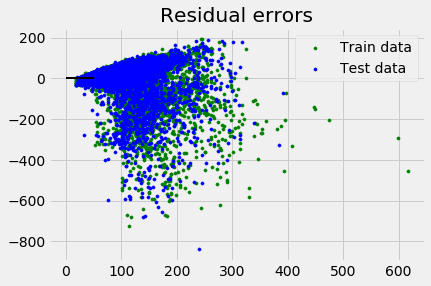

In [8]:
# defining feature matrix(X) and response vector(y)
X = data1
y = data.Appliances
 
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,
                                                    random_state=1)
gbrt=GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(X_train, y_train) 
y_pred=gbrt.predict(X_test)
print (gbrt.feature_importances_)
predicted_train=gbrt.predict(X_train)
predicted_test=gbrt.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))
#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))

#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=gbrt.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



#### Calculating MAPE
def mean_absolute_percentage_error(y_test,x_predict):
    np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.mean(np.abs((y_test - x_predict)/y_test))*100   
test_mape = mean_absolute_percentage_error(y_test, predicted_test)
train_mape = mean_absolute_percentage_error(y_train, predicted_train)
print("test_mape : " + str(test_mape))
print("train_mape : " + str(train_mape))
print('Variance score: {}'.format(gbrt.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(gbrt.predict(X_train), gbrt.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(gbrt.predict(X_test), gbrt.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

### HIT and TRIAL for the Train and Test Division, to get the best results

Division : Train = 80 Test = 20

RMSE : 87.46
R2 : 0.30

Division : Train = 75 Test = 25

RMSE : 87.04
R2 : 0.306

Division : Train = 70 Test = 30

RMSE : 85.68
R2 : 0.305

Division : Train = 65 Test = 35

RMSE : 85.26
R2 : 0.305

Division : Train = 60 Test = 40

RMSE : 85.08
R2 : 0.302

#### Division 65, 35 is selected

## with Appliances Scaled

In [9]:
data1.head(5)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,5.1,28.642668,28.642668,2016,1,17,11,0,0,62400
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,5.0,45.410389,45.410389,2016,1,17,11,0,0,63000
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,4.9,10.084097,10.084097,2016,1,17,11,0,0,63600


In [10]:
a1 = data.Appliances
a2 = a1.values
a3 = a2.reshape((len(a2), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a3)
data1['appliances_scaler']  = appliances_scaler
data1.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM,appliances_scaler
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,13.275433,13.275433,2016,1,17,11,0,0,61200,0.046729
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,18.606195,18.606195,2016,1,17,11,0,0,61800,0.046729
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,28.642668,28.642668,2016,1,17,11,0,0,62400,0.037383
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,45.410389,45.410389,2016,1,17,11,0,0,63000,0.037383
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,10.084097,10.084097,2016,1,17,11,0,0,63600,0.046729


In [11]:
data2 = data1.drop('appliances_scaler',1)
data2.head(5)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,5.1,28.642668,28.642668,2016,1,17,11,0,0,62400
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,5.0,45.410389,45.410389,2016,1,17,11,0,0,63000
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,4.9,10.084097,10.084097,2016,1,17,11,0,0,63600


In [12]:
# defining feature matrix(X) and response vector(y)
X = data2
y = data1.appliances_scaler
 
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,
                                                    random_state=1)


In [13]:
gbrt=GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(X_train, y_train) 
y_pred=gbrt.predict(X_test)
 
predicted_train=gbrt.predict(X_train)
predicted_test=gbrt.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))
#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))
#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=gbrt.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



#### Calculating MAPE
def mean_absolute_percentage_error(y_test,x_predict):
    np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.mean(np.abs((y_test - x_predict)/y_test))*100   
test_mape = mean_absolute_percentage_error(y_test, predicted_test)
train_mape = mean_absolute_percentage_error(y_train, predicted_train)
print("test_mape : " + str(test_mape))
print("train_mape : " + str(train_mape))

predicted_train : [ 0.05390085  0.06264337  0.02504849 ...,  0.10882598  0.07219341
  0.05458832]
predicted_test : [ 0.03734032  0.07111162  0.09807275 ...,  0.0863589   0.04026446
  0.13241992]
test_mae : 0.0425941214643
train_mae : 0.0405134971274
test_rmse : 0.0796691483209
train_rmse : 0.075525274829
test_r2 : 0.305477086174
train_r2 : 0.380175779234
test_mape : inf
train_mape : inf


### Wrong Results : The above model didnt gave us correct result, coz if we scale on the appliances, the effect of the all the features(Unscaled) on the scaled Appliances will definetly give the wrong results. So we move fwd with scaling the whole data using MinMax Method.

## All these trials to make sure Anamolies dont impact our RMSE and R2, which plays a important role in model selection

## with scaling whole data

In [14]:
data1.head(2)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM,appliances_scaler
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,13.275433,13.275433,2016,1,17,11,0,0,61200,0.046729
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,18.606195,18.606195,2016,1,17,11,0,0,61800,0.046729


In [15]:
data2.head(2)

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,5.3,13.275433,13.275433,2016,1,17,11,0,0,61200
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,5.2,18.606195,18.606195,2016,1,17,11,0,0,61800


In [16]:

# defining feature matrix(X) and response vector(y)
X = data2
y = data1.appliances_scaler


 
# splitting X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,
                                                    random_state=1)
 
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:

gbrt=GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(X_train, y_train) 
y_pred=gbrt.predict(X_test)
print("R-squared for Train: %.2f" %gbrt.score(X_train, y_train))
print("R-squared for Test: %.2f" %gbrt.score(X_test, y_test)) 
predicted_train=gbrt.predict(X_train)
predicted_test=gbrt.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))
#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))
#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=gbrt.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



#### Calculating MAPE
def mean_absolute_percentage_error(y_test,x_predict):
    np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.mean(np.abs((y_test - x_predict)/y_test))*100   
test_mape = mean_absolute_percentage_error(y_test, predicted_test)
train_mape = mean_absolute_percentage_error(y_train, predicted_train)
print("test_mape : " + str(test_mape))
print("train_mape : " + str(train_mape))

R-squared for Train: 0.38
R-squared for Test: 0.31
predicted_train : [ 0.05390085  0.06264337  0.02504849 ...,  0.10882598  0.07219341
  0.05458832]
predicted_test : [ 0.03734032  0.07111162  0.09807275 ...,  0.0863589   0.04026446
  0.13241992]
test_mae : 0.0426145176887
train_mae : 0.0405134971274
test_rmse : 0.0796748367245
train_rmse : 0.075525274829
test_r2 : 0.305377904301
train_r2 : 0.380175779234
test_mape : inf
train_mape : inf


## on the already given Training and Testing data with scaling the same data

In [18]:
import pandas as pd
df_train = pd.read_csv("training.csv")
X_train = df_train.drop("Appliances",1)
y_train = pd.DataFrame(df_train["Appliances"])
df_test = pd.read_csv("testing.csv")
X_test = df_test.drop("Appliances",1)
y_test = pd.DataFrame(df_test["Appliances"])
X_train = X_train.set_index('date')
X_train = X_train.drop('Day_of_week',1)
X_train = X_train.drop('WeekStatus',1)
X_test = X_test.set_index('date')
X_test = X_test.drop('Day_of_week',1)
X_test = X_test.drop('WeekStatus',1)
X_test.head(2)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


y_train = pd.DataFrame(df_train["Appliances"])
a1 = y_train.Appliances
a2 = a1.values
a3 = a2.reshape((len(a2), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a3)
y_train['appliances_scaler']  = appliances_scaler
y_train = y_train.drop("Appliances",1)


y_test = pd.DataFrame(df_test["Appliances"])

a4 = y_test.Appliances
a5 = a4.values
a6 = a5.reshape((len(a5), 1))
min_max_scaler = preprocessing.MinMaxScaler()
appliances_scaler = min_max_scaler.fit_transform(a6)
y_test['appliances_scaler']  = appliances_scaler
y_test = y_test.drop("Appliances",1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:

gbrt=GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(X_train, y_train) 
y_pred=gbrt.predict(X_test)

predicted_train=gbrt.predict(X_train)
predicted_test=gbrt.predict(X_test)
print("predicted_train : " + str(predicted_train))
print("predicted_test : " + str(predicted_test))
def mae(actual,prediction):
    return mean_absolute_error(actual,prediction)
test_mae=mae(y_test,predicted_test)
train_mae=mae(y_train,predicted_train)
print("test_mae : " + str(test_mae))
print("train_mae : " + str(train_mae))
#### RMSE Calculation of model
def rmse(actual,prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
test_rmse = rmse(y_test,predicted_test)
train_rmse=rmse(y_train,predicted_train)
print("test_rmse : " + str(test_rmse))
print("train_rmse : " + str(train_rmse))
#### R Squared error calculation
test_r2=r2_score(y_test,predicted_test)
train_r2=gbrt.score(X_train,y_train)
print("test_r2 : " + str(test_r2))
print("train_r2 : " + str(train_r2))



#### Calculating MAPE
def mean_absolute_percentage_error(y_test,x_predict):
    np.seterr(divide='ignore',invalid='ignore')
    y_test,x_predict=np.array(y_test),np.array(x_predict) 
    return np.mean(np.abs((y_test - x_predict)/y_test))*100   
test_mape = mean_absolute_percentage_error(y_test, predicted_test)
train_mape = mean_absolute_percentage_error(y_train, predicted_train)
print("test_mape : " + str(test_mape))
print("train_mape : " + str(train_mape))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predicted_train : [ 0.13754391  0.13754391  0.15270114 ...,  0.1437195   0.17672323
  0.16812989]
predicted_test : [ 0.16372775  0.16555792  0.16683994 ...,  0.12326373  0.12874749
  0.17740871]
test_mae : 0.0418668713711
train_mae : 0.0412985743888
test_rmse : 0.0805052037838
train_rmse : 0.0765291727212
test_r2 : 0.294592976123
train_r2 : 0.365797439236
test_mape : inf
train_mape : inf


## # from the above regession we came to know that the rmse / r2 for the spliting we performed on our data is better for modeling then what we got from the already given train test split. Hence we decided to move fwd to our dataset